In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
x = np.array(range(1,201))
y = np.random.randint(1,101,200)


In [131]:
df1 = pd.DataFrame (list(zip(x,y)) , columns = ['x' , 'y'])


In [140]:
d1= []
dflist = []
centlist =[]
for i in range(2,6):
    df = df1.copy()
    centroid =df.sample(i).reset_index(drop= True)
    centroid_hold = centroid.copy()
    
    while True :
        for j in range(i):
            
            d = 'dist' + str(j+1)
            df[d] = np.sqrt(np.square(df.x - centroid.x[j]) + np.square(df.y - centroid.y[j]))
            d1.append(d)
        df['grp'] = df[d1].idxmin(axis=1)
        centroid = df.groupby('grp')['x', 'y'].mean().reset_index(drop=True)
        
        if centroid.equals(centroid_hold) :
            break
        centroid_hold = centroid.copy()    
    dflist.append(df)
    centlist.append(centroid)
    print(df)
    

       x   y       dist1       dist2    grp
0      1  30   53.042753  150.553573  dist1
1      2  25   54.139945  150.237074  dist1
2      3  81   57.239965  151.194637  dist1
3      4  72   51.850686  148.488580  dist1
4      5  10   59.966104  150.324909  dist1
5      6  42   45.056560  144.615554  dist1
6      7  48   43.512913  143.500169  dist1
7      8  89   58.321982  148.341964  dist1
8      9  50   41.510644  141.517414  dist1
9     10  79   50.365202  143.926851  dist1
10    11  83   52.078533  143.877373  dist1
11    12  16   50.746562  142.099326  dist1
12    13  21   46.836029  140.083612  dist1
13    14  18   47.926752  139.710767  dist1
14    15  38   37.182975  135.852488  dist1
15    16  98   59.877989  143.569838  dist1
16    17  20   44.347870  136.359739  dist1
17    18  82   46.274114  136.847574  dist1
18    19  40   32.777029  131.729945  dist1
19    20   7   51.954726  136.723291  dist1
20    21  88   48.852570  135.601985  dist1
21    22  14   45.182448  132.86

[200 rows x 7 columns]
       x   y       dist1       dist2       dist3       dist4       dist5  \
0      1  30  108.321374   39.662593  117.728061   53.166927  171.958813   
1      2  25  109.721101   38.017256  116.660726   56.642167  171.644906   
2      3  81   95.467900   69.261254  128.105467   31.797437  171.391596   
3      4  72   94.554323   61.241733  123.572462   29.516200  169.042168   
4      5  10  115.179512   37.065931  114.765895   68.302077  171.611174   
5      6  42   98.949078   39.180624  113.799745   40.755521  165.932850   
6      7  48   96.012083   41.706199  113.820457   35.807905  164.724784   
7      8  89   91.141209   73.853635  127.376649   30.624883  168.110057   
8      9  50   93.504652   41.449653  112.271148   32.983078  162.703503   
9     10  79   88.414478   64.021406  120.931666   24.517530  164.150151   
10    11  83   87.579221   67.146445  121.855813   25.031198  163.904953   
11    12  16  105.994906   28.653553  107.116942   60.051426  163

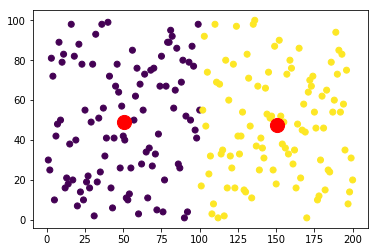

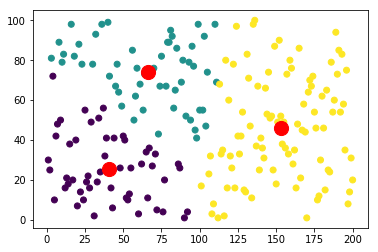

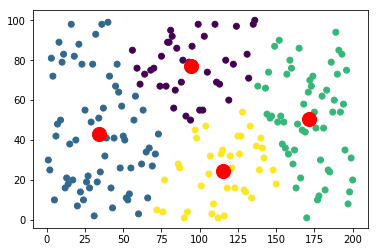

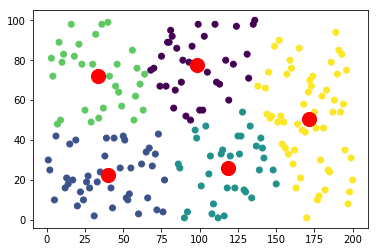

In [145]:
for i in range (4):
    plt.scatter(dflist[i].x , dflist[i].y, c=dflist[i].grp.str[4:].astype(int))
    plt.scatter(centlist[i].x, centlist[i].y, s=200, c='r' )
    plt.show()